In [1]:
#Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
#criar uma tabela no pandas
#ler o ficheiro csv
df = pd.read_csv("data.csv")
print(df)

     Data  Horas  minutos  alt   fenómeno
0       1      3       31  3.2  Preia-mar
1       1      9       30  0.7  Baixa-mar
2       1     15       42  3.4  Preia-mar
3       1     21       50  0.6  Baixa-mar
4       2      4        0  3.3  Preia-mar
..    ...    ...      ...  ...        ...
115    30     21       19  0.7  Baixa-mar
116    31      3       31  3.3  Preia-mar
117    31      9       34  0.7  Baixa-mar
118    31     15       44  3.3  Preia-mar
119    31     21       48  0.7  Baixa-mar

[120 rows x 5 columns]


In [3]:
#Criar uma nova coluna com os minutos passados desde o início do 1º dia do mês
df["tempo"] = ((df["Data"]-1) * 24 * 60) + (df["Horas"] * 60) + df["minutos"]
print(df)



     Data  Horas  minutos  alt   fenómeno  tempo
0       1      3       31  3.2  Preia-mar    211
1       1      9       30  0.7  Baixa-mar    570
2       1     15       42  3.4  Preia-mar    942
3       1     21       50  0.6  Baixa-mar   1310
4       2      4        0  3.3  Preia-mar   1680
..    ...    ...      ...  ...        ...    ...
115    30     21       19  0.7  Baixa-mar  43039
116    31      3       31  3.3  Preia-mar  43411
117    31      9       34  0.7  Baixa-mar  43774
118    31     15       44  3.3  Preia-mar  44144
119    31     21       48  0.7  Baixa-mar  44508

[120 rows x 6 columns]


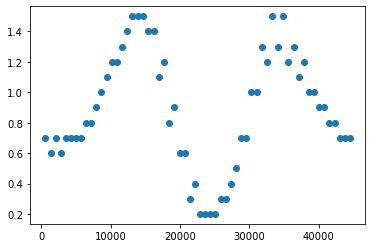

In [4]:
#Gráfico para a maré baixa

#Extrair o tempo (em minutos) de cada ponto
X = []
i=0
for data in df["tempo"]:
    if i%2 != 0:
        X.append(data)
    i += 1

#Extrair o nível da água em cada ponto
Y = []
i=0
for data in df["alt"]:
    if i%2 != 0:
        Y.append(data)
    i += 1

#Criar uma segunda tabela apenas com estes valores
dicionario = {"X": X, "Y": Y}
df2 = pd.DataFrame(dicionario)

#Associar cada coluna da tabela a uma constante
X = df2["X"]
Y = df2["Y"]

#Fazer o gráfico dos pontos obtidos do IPMA
plt.scatter(X,Y)

In [6]:
#Fazer uma suposição inicial, de modo a facilitar a aproximação
def get_p0(x, y):
 a0 = (max(y[0:30000]) - min(y[0:30000]))/2
 d0 = 0.9
 c0 = -30000
 b0 = 2.*np.pi/20000
 return [a0, b0,c0, d0]
initial = get_p0(X, Y)
print(initial)

[0.65, 0.0003141592653589793, -30000, 0.9]


[ 4.89327956e-01  2.81078684e-04 -3.71751363e+04  8.87900039e-01]
Accuracy of Linear Model (R²) :  0.849


Text(0.5, 0, 'x -> tempo (min)')

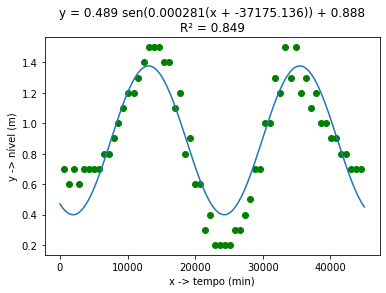

In [44]:
#função de uma onda sinusoidal
def sinusoid(x,A,b,c,d):
 return A*np.sin(b*(x-c)) + d

#Regressão
param, covariance = curve_fit(sinusoid, X, Y, initial)
print(param)
A = round(param[0], 3)
B = round(param[1], 6)
C = round(param[2], 3)
D = round(param[3], 3)
#Criar novo domínio [0,45000]
finalX = np.linspace(0, 45000, 1000)

# Check the accuracy of model :
Accuracy =round(r2_score(Y,sinusoid(X, param[0],param[1],param[2],param[3])), 3)
print ("Accuracy of Linear Model (R²) : ",Accuracy)

#Fazer gráfico com os valores experimentais e com os valores teóricos
plt.plot(finalX,sinusoid(finalX, param[0],param[1],param[2],param[3]), label="Teórico")
plt.title(f"y = {A} sen({B}(x + {C})) + {D}\nR² = {Accuracy}")
plt.scatter(X,Y,c="green", label="Dados")
plt.legend()
plt.ylabel("y -> nível (m)")
plt.xlabel("x -> tempo (min)")




Accuracy of Linear Model (R²) :  0.8485342256030355
